# OpenRC Truggy V2.0 - Modelo matemático simple

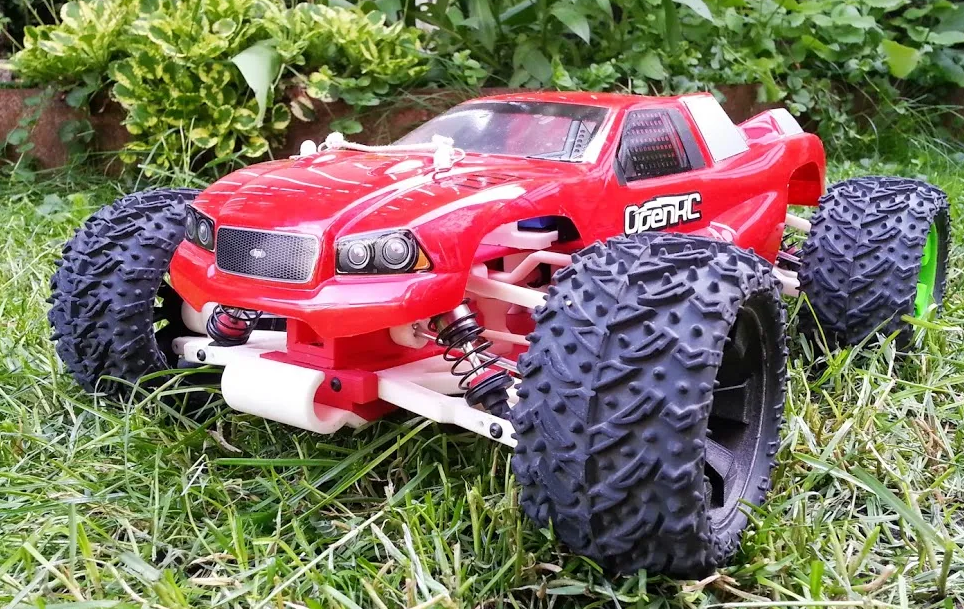

## Objetivos del análisis

1. Definir los parámetros asociados al vehículo
2. Calcular variables geométricas
  1. Límites para la dirección
  2. Ángulos de giro
  3. Pendiente máxima
3. Calcular Torque mínimo necesario en el motor
4. Calcular Potencia eléctrica necesaria para un tiempo de operación especificado
5. Calcular velocidad nominal



## Parámetros del vehículo



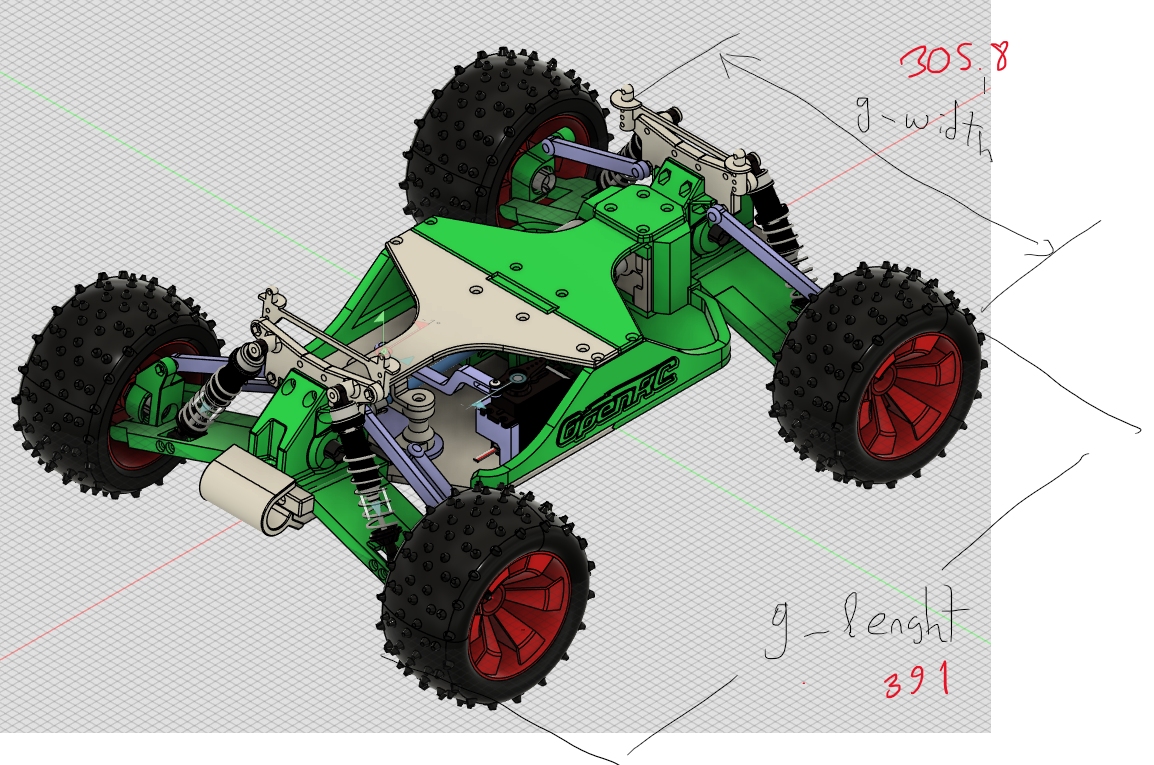

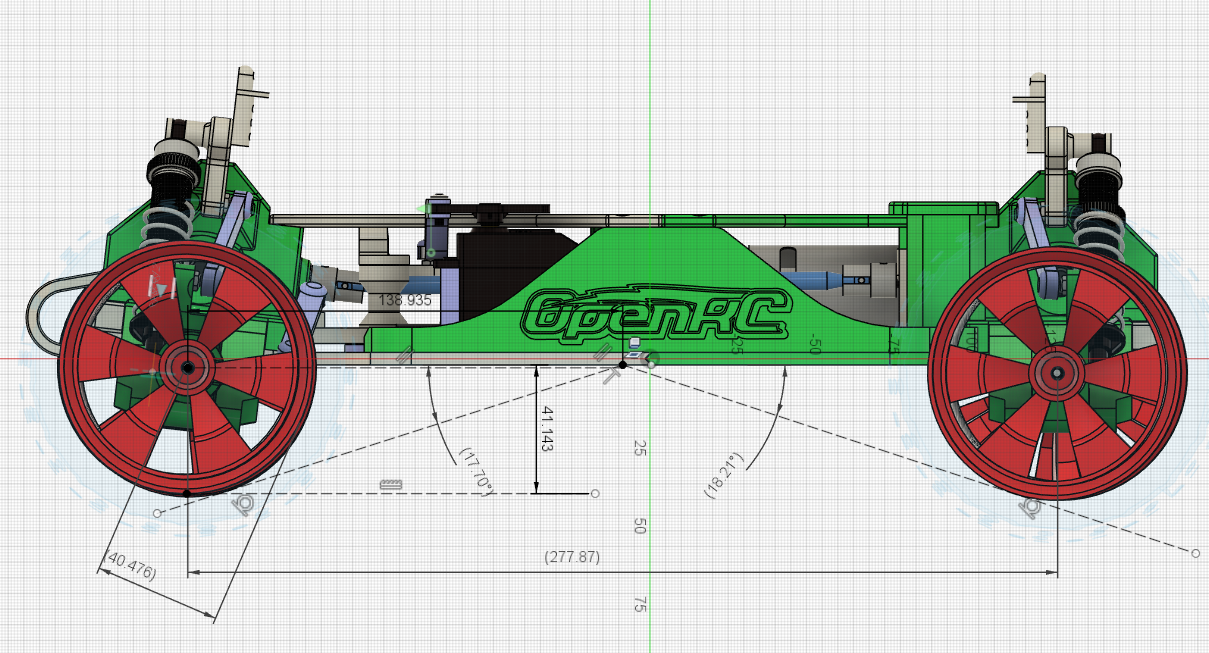

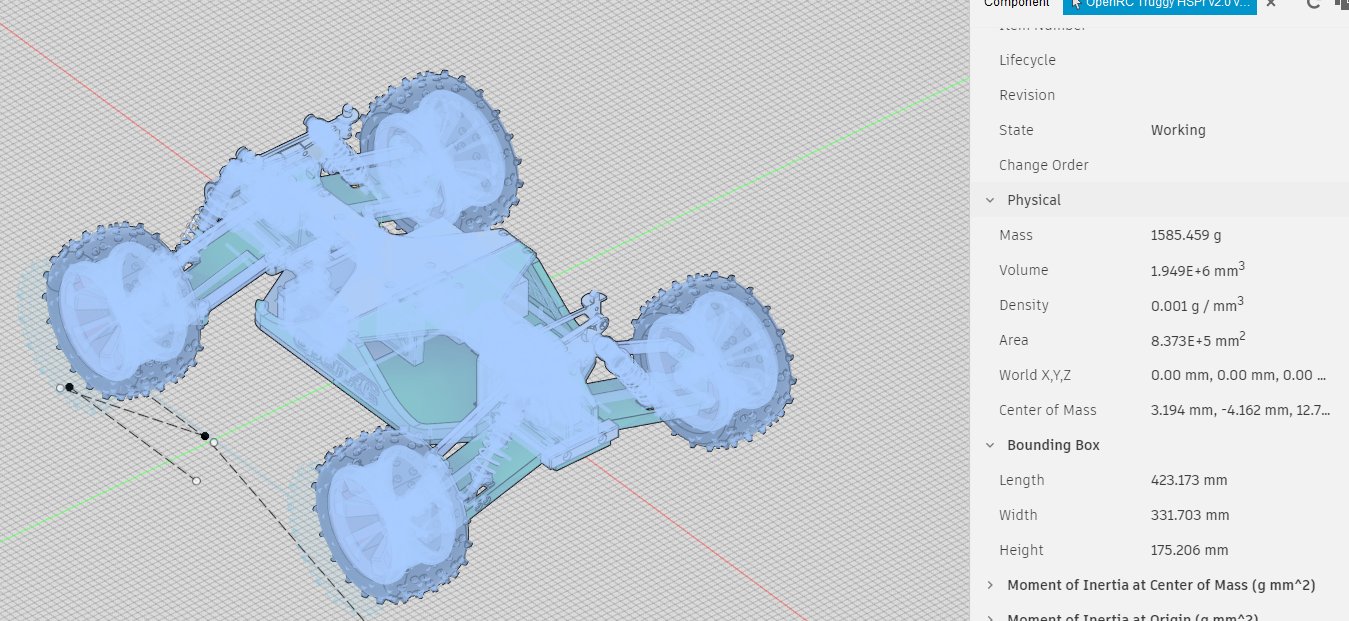

# Modelo estático

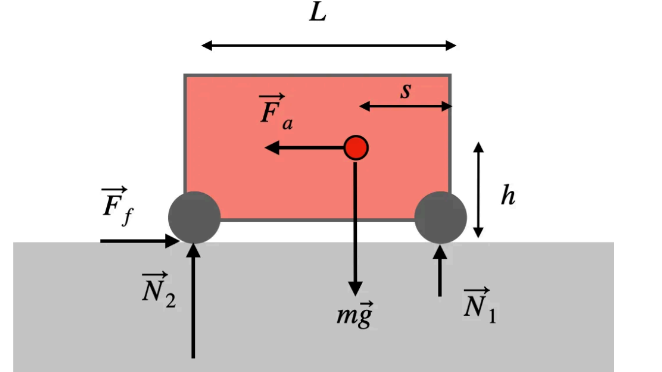

Fuente: https://rjallain.medium.com/the-physics-of-front-wheel-vs-rear-wheel-drive-cars-d3bee6d07e72

Las ecuaciones que rigen el modelo son las de newton de estática, asumiendo que hay una fuerza igual a la fricción que hace que el carro no se mueva. Esta fuerza es la necesaria para que el carro empiece a moverse, por lo cual esta será la mínima a superar por el motor.

$\overrightarrow{F_f}+\overrightarrow{F_a} = 0$

$\overrightarrow{N_1}+\overrightarrow{N_2} + m\overrightarrow{g} = 0$

Para la sumatoria de torques con respecto al punto de contacto, osea las ruedas de atrás, mirémoslo vectorialmente también

$\overrightarrow{L-s}\times\overrightarrow{N_2} + \overrightarrow{s}\times\overrightarrow{N_1} + \overrightarrow{h}\times\overrightarrow{F_f}= 0$

llevémoslo todo a términos escalares, pero dejémosle al vector $\overrightarrow{g} la dirección en ambas ecuaciones (las normales y las fuerzas no van a cambiar pero esta sí

$-F_a + F_f + mg\cos{\theta} = 0$

en $x$, ojo con la dirección de la gravedad, vamos a medirla de forma absoluta. Por ejemplo, en este caso que es plano, $\theta = 270º$, seno es -1 y coseno es 0.

$F_a = \mu_sN_2 + mg\cos{\theta}$  

y para $y$ tenemos

$N_2 + N_1 + mg\sin{\theta} = 0$, luego

$N_2 = -N_1 - mg\sin{\theta}$

pero despejando de la ecuación de $x$ para que todo me quede en términos de $N_1$

$F_a = -\mu_sN_1 - \mu_smg\sin{\theta} + mg\cos{\theta}$  

$F_a = -\mu_sN_1 - mg(\mu_s\sin{\theta} + \cos{\theta})$  

Queda faltando una expresión para la normal, que sacaremos de la sumatoria de torques alrededor del punto de contacto de la rueda trasera. En el plano era

$F_ah -mg(L-s) + N_1L = 0$

pero como ya incluimos el peso con la pendiente, el vector distancia a ese punto depende de la pendiente, tal que







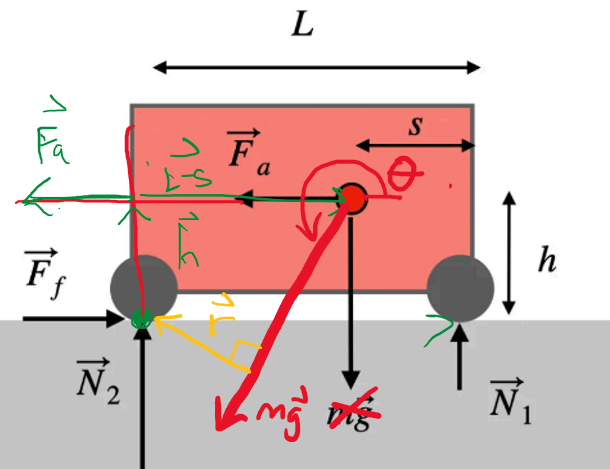

La cuestión es el valor de la magnitud de $\overrightarrow{r}$. Para hallarla necesitamos usar geometría:

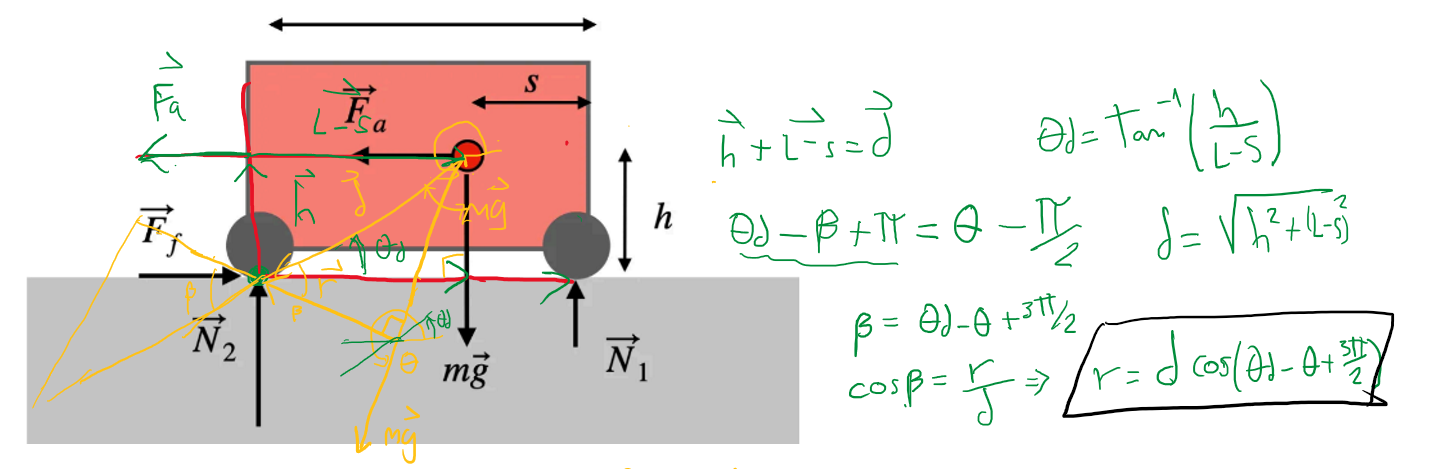

una expresión para $r$ sería:

$r = d\cos({\theta_d - \theta + \frac{3\pi}{2}})$

donde

$d = \sqrt{h^2+(L-s)^2}$ y

$\theta_d = \tan^{-1}(\frac{h}{L-s})$


Probemos esto con un caso concreto



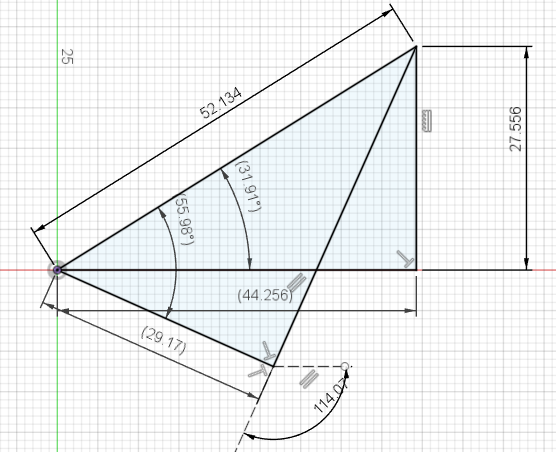

In [1]:
# Módulos
import numpy as np

d = 52.134
thd = np.radians(31.91)
th = np.radians(360-114.07)
r = d*np.cos(thd-th+3*np.pi/2)
r

29.16804804389839

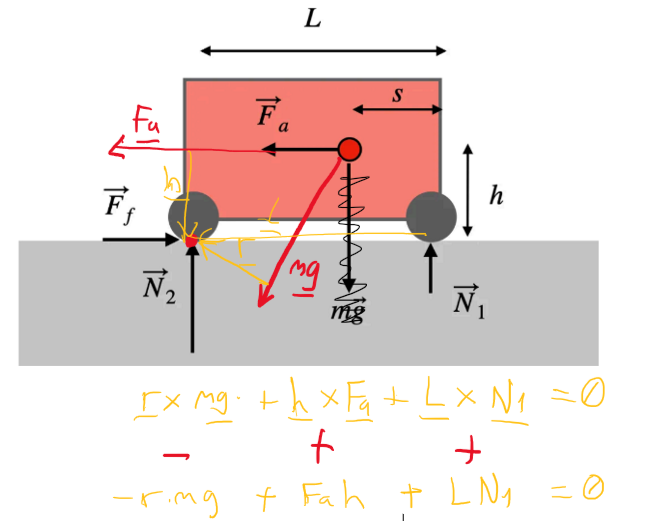

Ahora la sumatoria de torques queda

$F_ah -mgr + N_1L = 0$

de manera que



$N_1 = \frac{mgr-F_ah}{L}$

y

$F_a = \mu_smg\frac{1-\frac{r}{L}}{1-\frac{\mu_sh}{L}}$

Por lo que ya podemos calcular $N_2$ y obtener así $F_f$

In [3]:
# Parámetros generales (gen)
gen_max_width = 0.3058
gen_max_length = 0.391
gen_min_height = 0.041143
gen_axleDist = 0.27787
gen_min_rimRad = 0.040476
gen_min_ventralFrontAng = np.radians(17.70)
gen_min_ventralBackAng = np.radians(18.21)

# Parámetros generales experimentales o medidos en modelo

gen_static_fr = 0.9 #poliuretano con pino: https://research.fs.usda.gov/treesearch/24191
gen_mass = 1.585 #kg
gen_g = 9.81
gen_theta_ramp = np.radians(0) #pendiente
gen_theta = np.radians(270) - gen_theta_ramp #dirección de la gravedad, pendiente positiva mueve la gravedad Clockwise
## Centro de masa general (ubicación con respecto al frente del carro)

gen_cm_x = gen_max_length/2 + 0.003194
gen_cm_y = gen_max_width/2 - 0.04162
gen_cm_z = gen_min_rimRad + 0.0127  # radio de los rines, si se incluye rueda, cambiar a ese D
gen_cm_d = np.sqrt(gen_cm_x**2 + gen_cm_z**2)


# Parámetros

mu_s = 0.7
thd = np.radians(31.91) ### ACTUALIZAR
x_ramp = 2
y_ramp = 1
th_ramp = np.arctan2(y_ramp,x_ramp)
## inclinación de la rampa absoluta
th = np.radians(270)-th_ramp
r = gen_cm_d*np.cos(thd-th+3*np.pi/2)
np.degrees(th_ramp),r

(26.56505117707799, 0.10754732825460298)

In [4]:
Fa = mu_s*gen_mass*gen_g*(1-r/gen_max_length)/(1-(mu_s*gen_cm_z)/gen_max_length)
Fa

8.720623151512171

In [5]:
N1 = (gen_mass*gen_g*r-Fa)/gen_max_length
N1

-18.026562344195877

In [6]:
N2 = -N1-gen_g*gen_mass*np.sin(th)
N2

31.933876572974917

In [7]:
Ff = N2*mu_s
Ff

22.35371360108244

### Torque en el motor

In [8]:
Tm = Ff*gen_min_rimRad/0.098 #conversión  de N-m a kg-cm
Tm


9.232539915483803

### Potencia mecánica

asumir una velocidad de desplazamiento de 1 m/s

velocidad angular x perímetro = velocidad lineal

In [9]:
V_car = 0.5
perimetro = 2*np.pi*gen_min_rimRad
Wm = V_car/perimetro
Wm*60

117.96245411495356

## Análisis cinemático

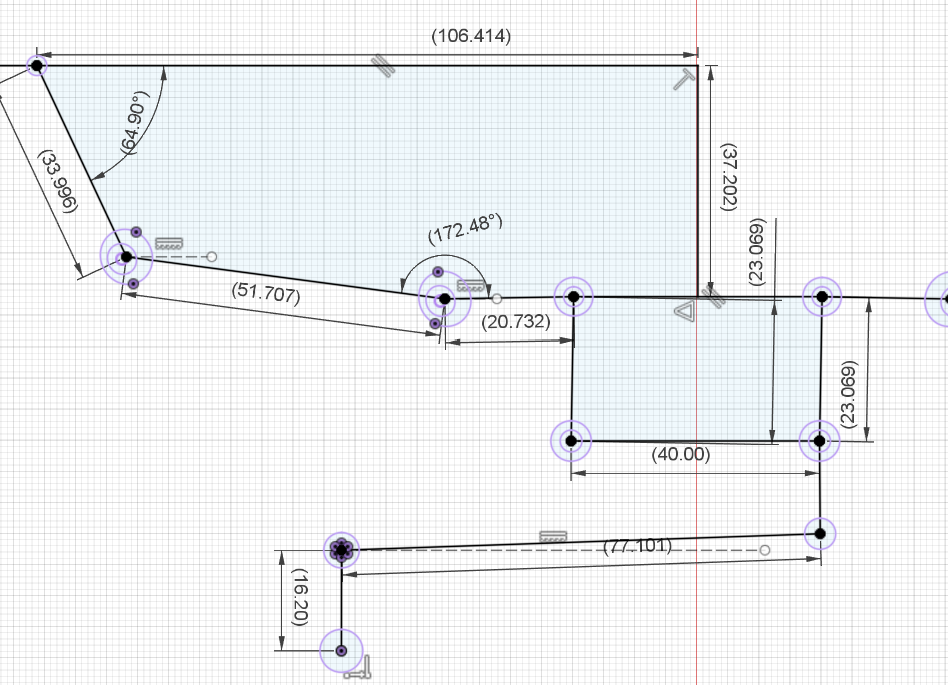

In [58]:
roffx = 20
r1ax = 106.414
r2 = 23.069
r1ay = 37.202 + r2
r4 = r2
r1b = 40
r3a = r1b
r3b = 20.732
r5 = 51.707
r6 = 33.996

th2 = np.pi/2
th3 = np.pi
th4 = np.pi/2
th5 = np.radians(172.48) + np.pi
th6 = np.radians(-64.9)
x0 = th3,th4,th5,th6

def truggy(x0):
 th3,th4,th5,th6 = x0
 return (roffx*np.cos(np.pi) + r1ax*np.cos(np.pi) + r6*np.cos(th6) + r5*np.cos(th5) - r3b*np.cos(th3) - r3a*np.cos(th3) - r2*np.cos(th2) - r1ay*np.cos(3*np.pi/2),
 r1ax*np.sin(np.pi) + r6*np.sin(th6) + r5*np.sin(th5) - r3b*np.sin(th3) - r3a*np.sin(th3) - r2*np.sin(th2) - r1ay*np.sin(3*np.pi/2),
 r2*np.cos(th2) + r3a*np.cos(th3) - r4*np.cos(th4) - r1b*np.cos(np.pi),
 r2*np.sin(th2) + r3a*np.sin(th3) - r4*np.sin(th4) - r1b*np.sin(np.pi))


truggy(x0)

(0.0013640129836528516, -0.3507290357257631, 0.0, -1.345873517788912e-15)

In [11]:

from scipy.optimize import fsolve
import matplotlib.pyplot as plt


In [59]:
th2 = np.pi/2
limite1 = np.radians(175-90)
limite2 = np.radians(90-65)
numpos = 100
th2v1 = np.linspace(th2,th2 + limite1,numpos)
th2v2 = np.linspace(th2 + limite1,th2 - limite2,numpos)
# th2v3 = np.linspace(th2 -limite2,th2,numpos)
th2v = np.concatenate((th2v1,th2v2))
numpos = len(th2v) - 1
th3v = []
th4v = []
th5v = []
th6v = []

for th2 in th2v:
  (th3,th4,th5,th6),d,ier,msg = fsolve(truggy,x0,full_output=True)
  x0=th3,th4,th5,th6
  if ier != 1:
    print('Error en la solución:',msg)
    numpos = len(th3v) - 1
    th2v = th2v[:numpos]
    print(np.degrees(th2v[-1]))
    break
  else:
    # print('Solución correcta:',msg)
    pass
  th3v.append(th3)
  th4v.append(th4)
  th5v.append(th5)
  th6v.append(th6)

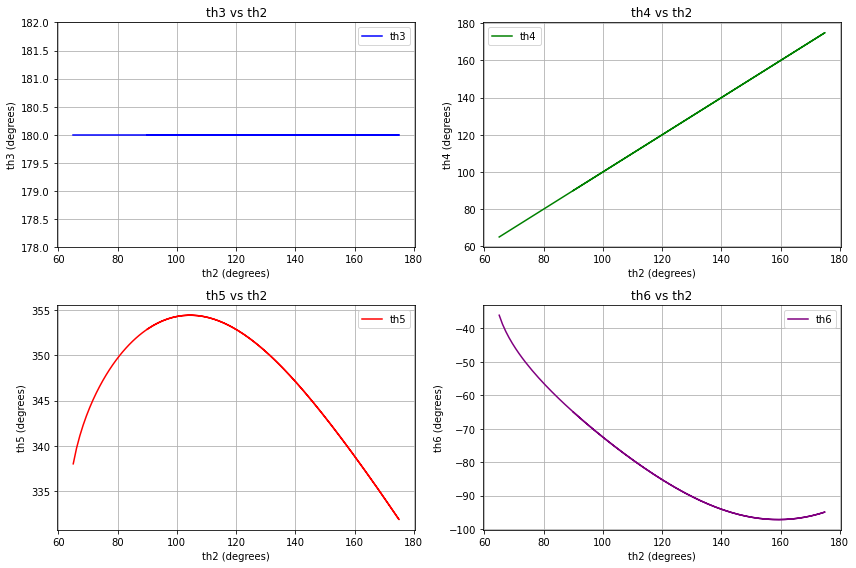

In [61]:
plt.figure(figsize=(12, 8))

# Plot th3 vs th2
plt.subplot(2, 2, 1)
plt.plot(np.degrees(th2v), np.degrees(th3v), label='th3', color='blue')
plt.xlabel('th2 (degrees)')
plt.ylabel('th3 (degrees)')
plt.title('th3 vs th2')
plt.grid(True)
plt.ylim(180-2,180+2)
plt.legend()

# Plot th4 vs th2
plt.subplot(2, 2, 2)
plt.plot(np.degrees(th2v), np.degrees(th4v), label='th4', color='green')
plt.xlabel('th2 (degrees)')
plt.ylabel('th4 (degrees)')
plt.title('th4 vs th2')
plt.grid(True)
plt.legend()

# Plot th5 vs th2
plt.subplot(2, 2, 3)
plt.plot(np.degrees(th2v), np.degrees(th5v), label='th5', color='red')
plt.xlabel('th2 (degrees)')
plt.ylabel('th5 (degrees)')
plt.title('th5 vs th2')
plt.grid(True)
plt.legend()

# Plot th6 vs th2
plt.subplot(2, 2, 4)
plt.plot(np.degrees(th2v), np.degrees(th6v), label='th6', color='purple')
plt.xlabel('th2 (degrees)')
plt.ylabel('th6 (degrees)')
plt.title('th6 vs th2')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Animación

Diagrama de puntos y vectores aquí.